In [1]:
import os
import random
import pandas as pd
import matplotlib.pyplot as plt
from PIL import Image

### Walk all images in dataset

In [37]:
img_base_dir = '/home/dsserver/projects/Manish/other/webscraper-karanjot/data/search_result_kitchen_images'
#img_base_dir = '/home/dsserver/projects/Manish/other/webscraper-karanjot/data/test'

In [38]:
data = []
for root, subdir, files in os.walk(img_base_dir):
    for file in files:
        query = str(root.rsplit('/',1)[-1])
        class_id = query.split('_')[-1]
        data.append([class_id, '{}.jpg'.format(query), os.path.join(root, file)])

### Dataframe of all images 

In [39]:
df_images = pd.DataFrame(data, columns=['class_id', 'query', 'results'])
print(df_images.shape)
df_images.head()

(11750, 3)


class_id         query                                            results
0       41  query_41.jpg  /home/dsserver/projects/Manish/other/webscrape...
1       41  query_41.jpg  /home/dsserver/projects/Manish/other/webscrape...
2       41  query_41.jpg  /home/dsserver/projects/Manish/other/webscrape...
3       41  query_41.jpg  /home/dsserver/projects/Manish/other/webscrape...
4       41  query_41.jpg  /home/dsserver/projects/Manish/other/webscrape...

In [40]:
df_images.to_csv('/home/dsserver/projects/Manish/other/webscraper-karanjot/data/test.csv')

### Random pick a imageset

In [55]:
query_id = random.randint(0,999)
results = df_images[df_images['class_id']==str(query_id)]['results'].tolist()
query_path = '/home/dsserver/projects/Manish/other/webscraper-karanjot/data/query_1000_kitchen_images/query_{}.jpg'.format(query_id)
results.insert(0, query_path)
print(query_id, len(results))

17 14


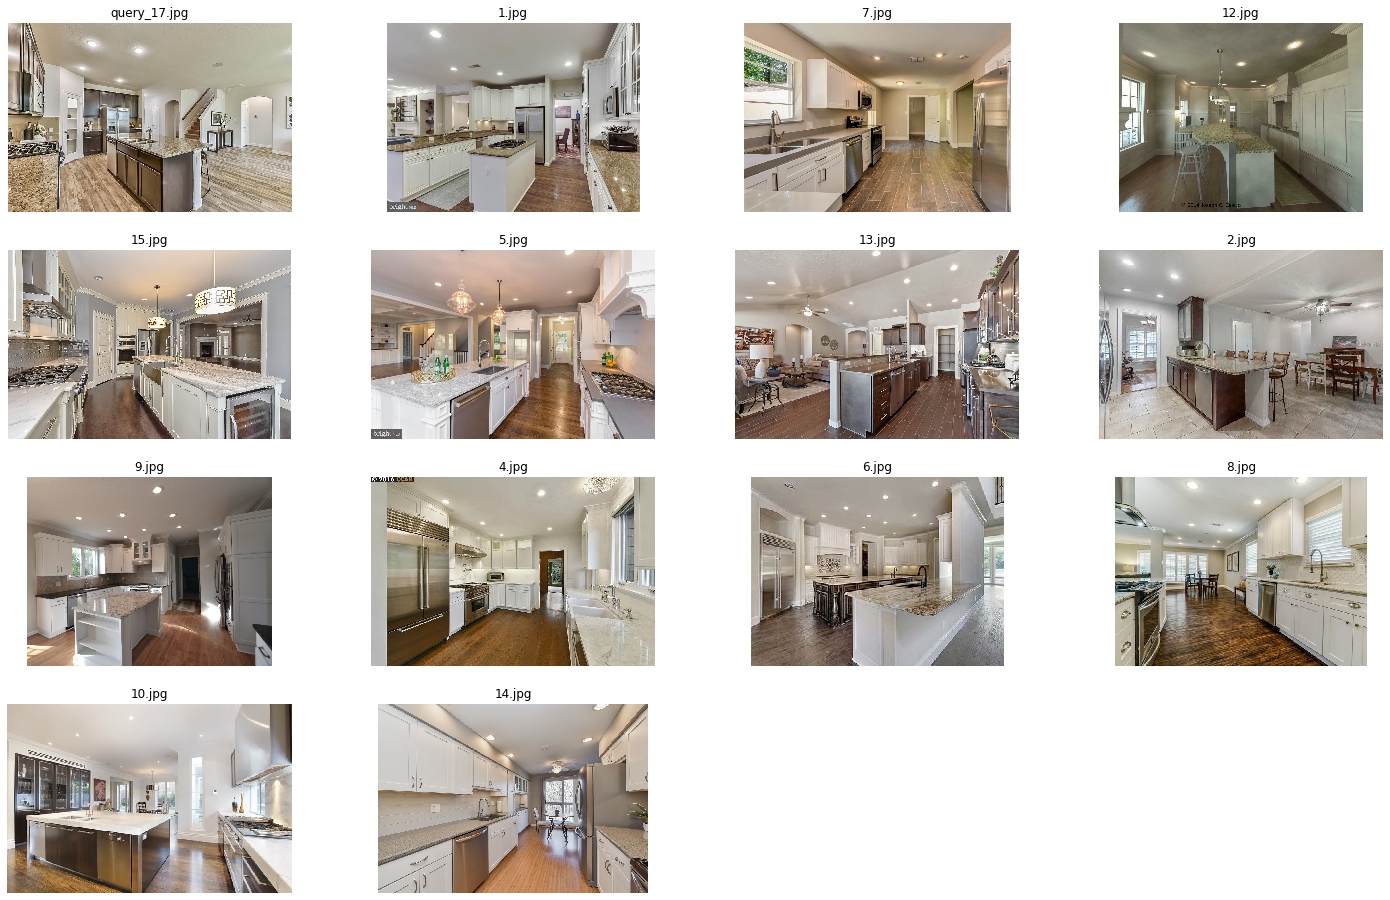

In [56]:
counter = 1
rows = 4
cols = 4
fig = plt.figure(figsize=(25,rows*4))
for path in results:
    ax = fig.add_subplot(rows, cols, counter)
    ax.title.set_text(path.rsplit('/',1)[-1])
    plt.axis('off')
    try:
        plt.imshow(Image.open(path))
    except:
        pass
    counter += 1